# 1. Standard Scaling

In [27]:
# import libraries
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler, MinMaxScaler, MaxAbsScaler


In [28]:
import pandas as pd

# Create a sample DataFrame
data = {
    'Age': [15, 18, 21, 25, 30, 35, 40],
    'Height': [150, 160, 165, 170, 175, 180, 185],
    'Weight': [45, 55, 60, 65, 70, 75, 80]
}

df = pd.DataFrame(data)

print(df)


   Age  Height  Weight
0   15     150      45
1   18     160      55
2   21     165      60
3   25     170      65
4   30     175      70
5   35     180      75
6   40     185      80


In [29]:
# import the scaler
scaler = StandardScaler()

# fit the scaler
scaler_df = scaler.fit_transform(df)

In [30]:
scaler_df

array([[-1.33078881, -1.72849788, -1.72849788],
       [-0.97703482, -0.83223972, -0.83223972],
       [-0.62328084, -0.38411064, -0.38411064],
       [-0.15160885,  0.06401844,  0.06401844],
       [ 0.43798113,  0.51214752,  0.51214752],
       [ 1.02757111,  0.9602766 ,  0.9602766 ],
       [ 1.61716109,  1.40840568,  1.40840568]])

In [31]:
# Converting array into dataframe
new_df = pd.DataFrame(scaler_df, columns=df.columns)

In [32]:
new_df

,Age,Height,Weight
0,-1.330789,-1.728498,-1.728498
1,-0.977035,-0.832240,-0.832240
2,-0.623281,-0.384111,-0.384111
3,-0.151609,0.064018,0.064018
4,0.437981,0.512148,0.512148
5,1.027571,0.960277,0.960277
6,1.617161,1.408406,1.408406


# 2. MinMaxScaler

In [33]:
# import the MinMaxScaler
scaler = MinMaxScaler()

# fit the scaler
scler_df = scaler.fit_transform(df)

scler_df

# convert the MinMaxScaler into dataframe
df = pd.DataFrame(scler_df, columns=df.columns)

df

,Age,Height,Weight
0,0.00,0.000000,0.000000
1,0.12,0.285714,0.285714
2,0.24,0.428571,0.428571
3,0.40,0.571429,0.571429
4,0.60,0.714286,0.714286
5,0.80,0.857143,0.857143
6,1.00,1.000000,1.000000


# 3. MaxAbsScaler

In [34]:
# import the MaxAbsScaler
scaler  = MaxAbsScaler()

# fit the scaler
scaler_df = scaler.fit_transform(df)

# convert the MinMaxScaler into dataframe
df = pd.DataFrame(scler_df, columns=df.columns)

df

,Age,Height,Weight
0,0.00,0.000000,0.000000
1,0.12,0.285714,0.285714
2,0.24,0.428571,0.428571
3,0.40,0.571429,0.571429
4,0.60,0.714286,0.714286
5,0.80,0.857143,0.857143
6,1.00,1.000000,1.000000


# **Transformation**

In [35]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [36]:
# generate non-normal data (exponential Distribution)
np.random.seed(0)
df = np.random.exponential(size=1000, scale=2)
df = pd.DataFrame(df, columns=['values'])
df.head()

,values
0,1.591749
1,2.511862
2,1.846446
3,1.574402
4,1.102097


<Axes: ylabel='Count'>

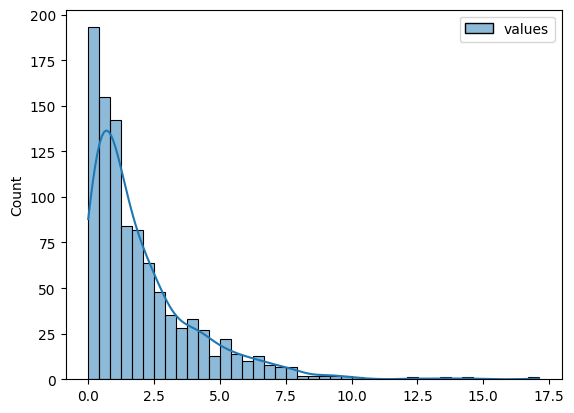

In [37]:
sns.histplot(df, kde=True)

In [38]:
from sklearn.preprocessing import PowerTransformer
from sklearn.preprocessing import QuantileTransformer

pt_boxcox = PowerTransformer(method='box-cox')

pt_yeo_jonson = PowerTransformer('yeo-johnson')

pt_quantile = QuantileTransformer(output_distribution='normal')

# box_cox need data must be postive

df['Box_Cox'] = pt_boxcox.fit_transform(df[['values']], + 1)

df['Yeo_Jason'] = pt_yeo_jonson.fit_transform(df[['values']])

df['Quantile'] = pt_quantile.fit_transform(df[['values']])


In [39]:
df.head()

,values,Box_Cox,Yeo_Jason,Quantile
0,1.591749,0.158969,0.179335,0.162552
1,2.511862,0.602906,0.677331,0.587964
2,1.846446,0.298068,0.339698,0.286135
3,1.574402,0.148897,0.167607,0.157469
4,1.102097,-0.164776,-0.202107,-0.154930


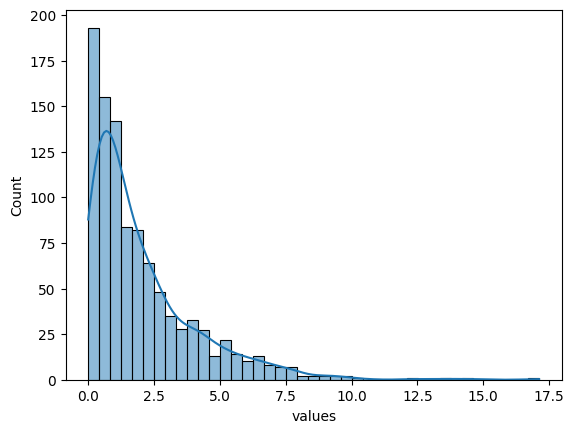

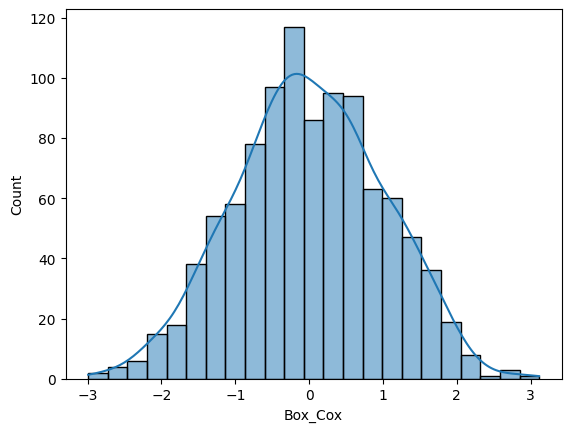

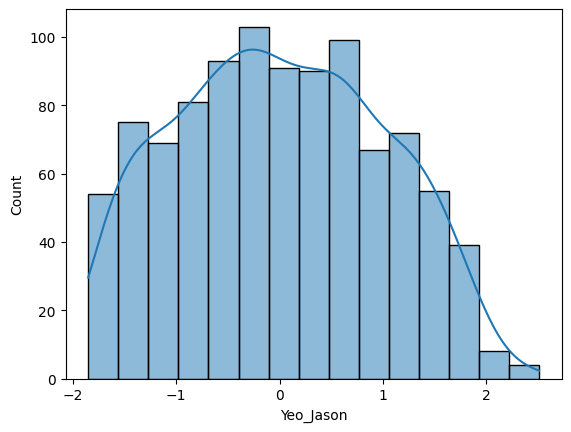

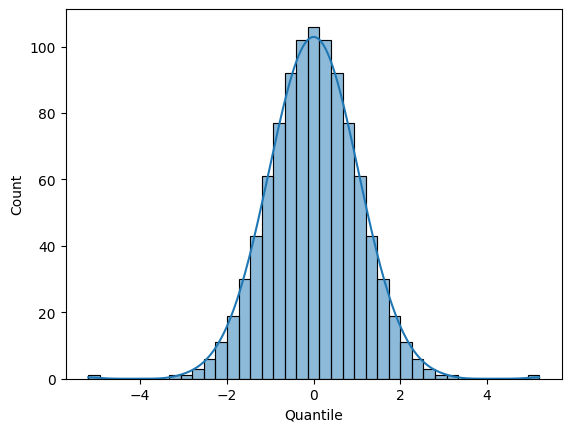

In [40]:
for col in df.columns:
    sns.histplot(df[col], kde=True)
    plt.show()